In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
d = pd.read_csv('dirty_data.csv')
d.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Chequeo de valores nulos en las columnas

In [4]:
d.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

Para este caso, el valor null se encuentra en una columna donde los datos son strings, esto no va a afectar a los cálculos.

Quiero saber si al menos quedó satisfecho con la compra:

In [45]:
d[d.isnull().any(axis=1)].index         #Busco el índice de la fila


Index([21], dtype='int64')

In [48]:
print(d.loc[21])

order_id                                                           ORD157688
customer_id                                                     ID1404219802
date                                                              2019-12-15
nearest_warehouse                                                     Bakers
shopping_cart                    [('Candle Inferno', 1), ('Toshika 750', 1)]
order_price                                                             4750
delivery_charges                                                       73.05
customer_lat                                                      -37.802818
customer_long                                                     144.992404
coupon_discount                                                            0
order_total                                                          4823.05
season                                                                winter
is_expedited_delivery                                                  False

Conteo de almacenes

In [7]:
warehouses = d['nearest_warehouse'].unique()
warehouses

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

Le cambio la inicial por mayúscula a los que iniciaban con minúscula

In [8]:
d['nearest_warehouse'] = d['nearest_warehouse'].str.capitalize()

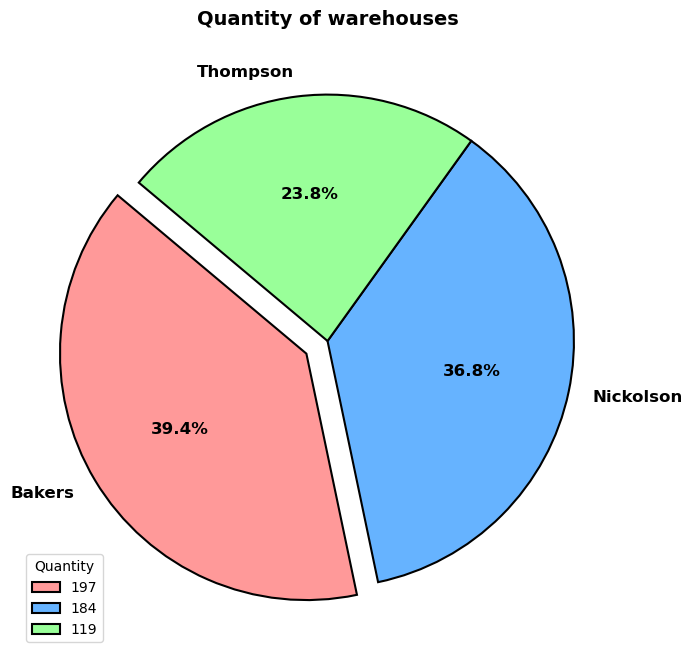

In [9]:
plt.figure(figsize=(8, 8))

c_warehouses = d['nearest_warehouse'].value_counts()
labels = ['Bakers', 'Nickolson', 'Thompson']
colors = ['#FF9999', '#66B3FF', '#99FF99']
explode = [0.1 if v == max(c_warehouses) else 0 for v in c_warehouses]        #Destaca la parte más grande

# wedge = cada porción del gráfico
# texts = lista con los etiquetas
# autotexts = lista con los porcentajes dentro de cada porción

wedges, texts, autotexts = plt.pie(
    c_warehouses, labels=labels, autopct="%0.1f%%", colors=colors, explode=explode,
    startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title('Quantity of warehouses', fontsize=14, fontweight='bold')
plt.legend(c_warehouses, loc='lower left', title='Quantity')
plt.show()

Total vendido por cada warehouse y cuanto representa del total vendido por la marca

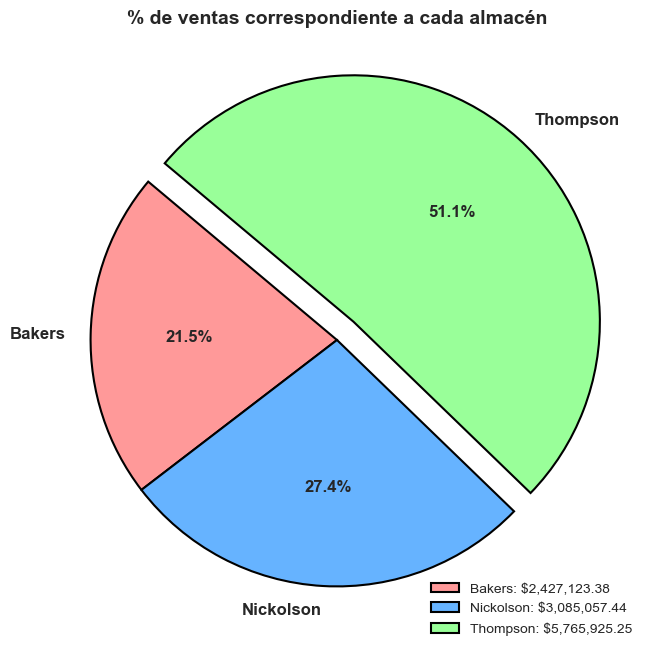

In [10]:
plt.style.use("seaborn-v0_8-darkgrid")      

total = d.groupby('nearest_warehouse')['order_total'].sum()
explode = [0.1 if v == max(total) else 0 for v in total]        #Destaca la parte más grande
labels = ['Bakers', 'Nickolson', 'Thompson']
colors = ['#FF9999', '#66B3FF', '#99FF99']

plt.figure(figsize=(8, 8))

# wedge = cada porción del gráfico
# texts = lista con los etiquetas
# autotexts = lista con los porcentajes dentro de cada porción

wedges, texts, autotexts = plt.pie(
    total, labels=labels, autopct="%0.1f%%", colors=colors, explode=explode,
    startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

plt.title('% de ventas correspondiente a cada almacén', fontsize=14, fontweight='bold')
plt.legend(
    labels=[f"{name}: ${value:,.2f}" for name, value in zip(labels, total)],
    loc=4, fontsize=10
)
plt.show()


In [11]:
print(f'Total vendido por almacen: {total}')

Total vendido por almacen: nearest_warehouse
Bakers       2427123.38
Nickolson    3085057.44
Thompson     5765925.25
Name: order_total, dtype: float64


¿Cuales fueron las 5 mayores ventas?

In [12]:
max5 = d['order_price'].nlargest(n=5)
max5

335    947691
237    865916
472    672832
70     655164
397    653959
Name: order_price, dtype: int64

¿Cuales fueron las 5 menores ventas?

In [13]:
min5 = d['order_price'].nsmallest(n=5)
min5

308     585
297     730
171    1010
192    1010
419    1010
Name: order_price, dtype: int64

Búsqueda de outliers

In [14]:
Q1_ot = d['order_total'].quantile(0.25)
Q3_ot = d['order_total'].quantile(0.75)
print(f'Lower Quartile is: {Q1_ot}') 
print(f'Upper Quartile is: {Q3_ot}')

median = d['order_total'].median()
mean = d['order_total'].mean()

IQR = Q3_ot-Q1_ot
print(f'Value of IQR_order_total is: {IQR}')

llimit = Q1_ot  - 1.5*IQR
ulimit = Q3_ot + 1.5*IQR

print(f'Lower limit of order_total is: {llimit}')
print(f'Upper limit of order_total is: {ulimit}')

d['outlier'] = ((d['order_total']<llimit) | (d['order_total']>ulimit))
out = d['outlier'].value_counts()
outliers = d[(d['order_total']<llimit) | (d['order_total']>ulimit)]     #Guardo los outliers en un df
out

Lower Quartile is: 6381.7875
Upper Quartile is: 17915.7725
Value of IQR_order_total is: 11533.984999999999
Lower limit of order_total is: -10919.189999999997
Upper limit of order_total is: 35216.75


outlier
False    482
True      18
Name: count, dtype: int64

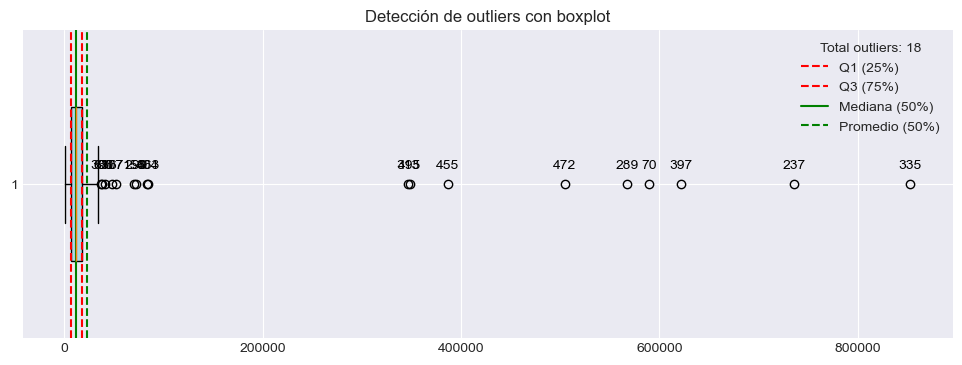

In [ ]:
plt.figure(figsize=(12, 4))

plt.boxplot(d['order_total'], vert=False, widths=0.5, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.axvline(Q1_ot, color='red', linestyle='dashed', label="Q1 (25%)")
plt.axvline(Q3_ot, color='red', linestyle='dashed', label="Q3 (75%)")
plt.axvline(median, color='green', linestyle='solid', label="Mediana (50%)")
plt.axvline(mean, color='green', linestyle='dashed', label="Promedio (50%)")

for index, value in zip(outliers.index, outliers['order_total']):
    plt.text(value, 1.05, str(index), fontsize=10, color='black', ha='center')

plt.title('Detección de outliers con boxplot')
plt.legend(title=f"Total outliers: {len(outliers)}")
plt.show()

¿Cuantos clientes quedaron satisfechos con su compra?

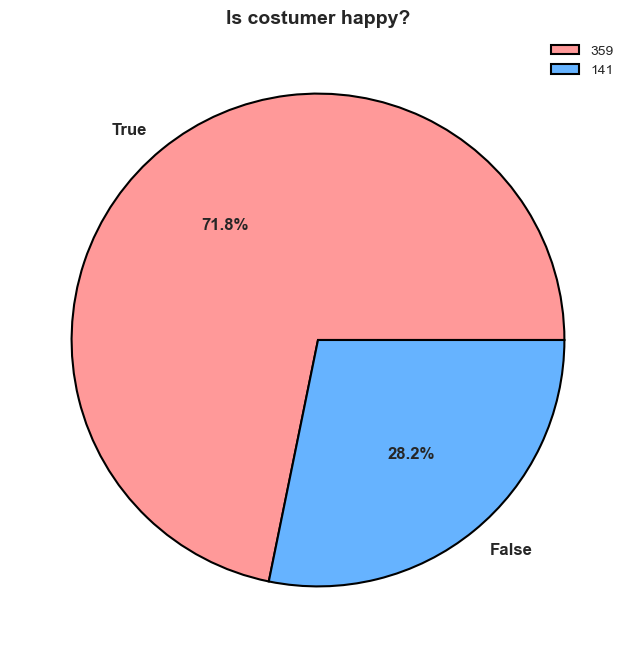

In [30]:
plt.figure(figsize=(12,8))

review = d['is_happy_customer'].value_counts()

wedges, texts, autotexts = plt.pie(review,
        labels=(['True','False']),
        autopct="%0.1f%%", colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
        textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Is costumer happy?',fontsize=14, fontweight='bold')
plt.legend(review)
plt.show()

¿Que porcentaje de clientes quedó satisfecho en cada almacen?

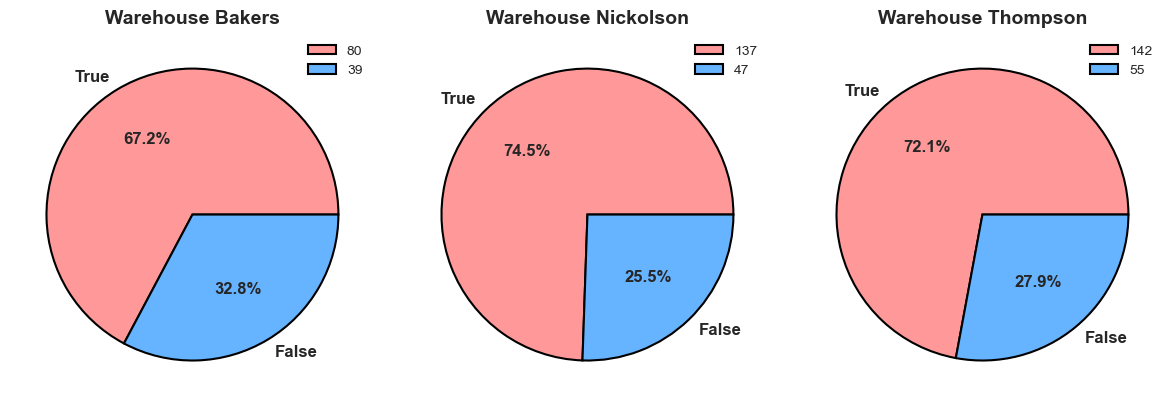

In [34]:
# Crea gráficos separados
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila, 3 columnas

for ax, (warehouse, group) in zip(axes, d.groupby('nearest_warehouse')):
    count_review = group['is_happy_customer'].value_counts()
    
    ax.pie(count_review, labels=count_review.index, autopct="%0.1f%%", wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
        textprops={'fontsize': 12, 'fontweight': 'bold'},colors=colors)
    ax.set_title(f'Warehouse {warehouse}', fontsize=14, fontweight='bold')
    ax.legend(count_review)
    

plt.tight_layout()
plt.show()

Algo que me gustaría analizar, es como se calculan los costos de envío. Para ello analizaré distintos parámetros para luego llegar a una fórmula para poder optimizar el cálculo del costo de envío.

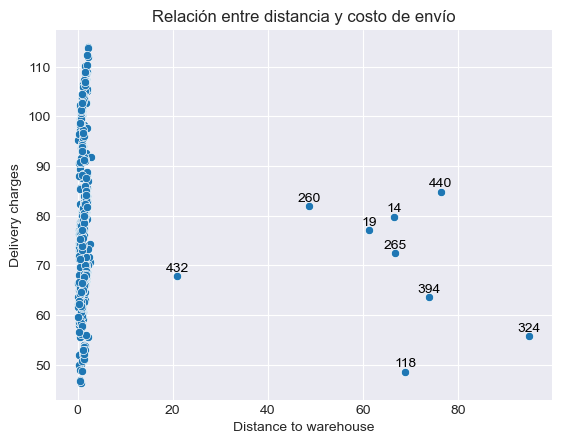

In [76]:
sns.scatterplot(x=d['distance_to_nearest_warehouse'], y=d['delivery_charges'])

for id, value in zip(d.index, d['distance_to_nearest_warehouse']):
    if value>20:
        plt.text(value, d.loc[id,'delivery_charges']+1, str(id), fontsize=10, color='black', ha='center')

plt.xlabel('Distance to warehouse')
plt.ylabel('Delivery charges')
plt.title('Relación entre distancia y costo de envío')
plt.show()

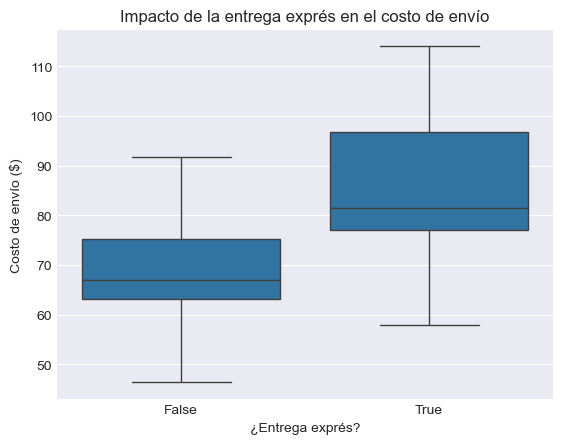

In [60]:
sns.boxplot(x=d["is_expedited_delivery"], y=d["delivery_charges"])
plt.xlabel("¿Entrega exprés?")
plt.ylabel("Costo de envío ($)")
plt.title("Impacto de la entrega exprés en el costo de envío")
plt.show()


Podemos notar que los envíos express tienen un cargo extra sobre el costo de envío.

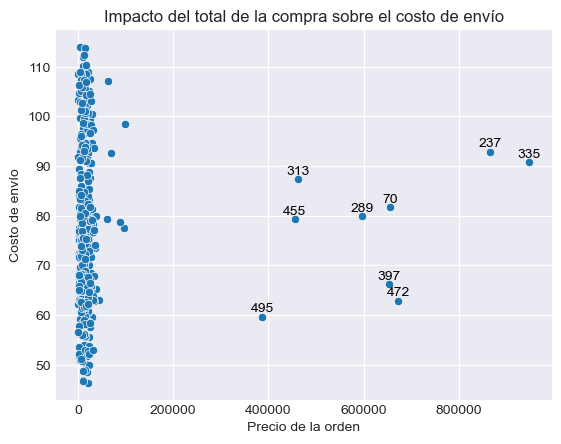

In [72]:
sns.scatterplot(x=d['order_price'], y=d['delivery_charges'])

for id, value in zip(d.index, d['order_price']):
    if value>200000:
        plt.text(value, d.loc[id,'delivery_charges']+1, str(id), fontsize=10, color='black', ha='center')

plt.xlabel('Precio de la orden')
plt.ylabel('Costo de envío')
plt.title('Impacto del total de la compra sobre el costo de envío')
plt.show()